In [198]:
import sys
import os
from preproc import get_list
import matplotlib.pyplot as plt



##**load data**

In [199]:
bigram = sc.parallelize(get_list())


##**compute match divide by volume**

In [200]:
def match_divide_by_volume(bigram):
    new_bigram = bigram.map(lambda x:((x[0],x[2]),(x[3],x[4])))
    reduced_bigram = new_bigram.reduceByKey(lambda a,b:map(sum,zip(a,b)))
    mdbv = reduced_bigram.map(lambda x:(x[0],float(x[1][0])/x[1][1]))
    return mdbv

mdbv = match_divide_by_volume(bigram)

top_15=mdbv.takeOrdered(15,lambda x:-x[1])
print top_15

[((u'data mining', 1980), 119.21212121212122), ((u'communist party', 1838), 37.333333333333336), ((u'nuclear weapon', 1766), 29.0), ((u'loop fission', 1996), 24.25), ((u'computer graphic', 1965), 20.59259259259259), ((u'closed source', 1910), 20.25), ((u'legacy system', 1989), 18.77777777777778), ((u'assembly language', 1955), 18.0), ((u'configuration management', 1963), 15.875), ((u'closed source', 1960), 13.5), ((u'machine language', 1956), 13.352459016393443), ((u'nuclear weapon', 1915), 13.0), ((u'configuration management', 1980), 12.389473684210527), ((u'communist party', 1952), 12.224144869215293), ((u'machine language', 1949), 12.0)]


##**get volume over all years**

In [201]:
def volume_over_all_years(bigram):
    new_bigram = bigram.map(lambda x:((x[0],x[2]),x[4]))
    voay = new_bigram.reduceByKey(lambda a,b:a+b)
    return voay

voay = volume_over_all_years(bigram)

print top_15


[((u'data mining', 1980), 119.21212121212122), ((u'communist party', 1838), 37.333333333333336), ((u'nuclear weapon', 1766), 29.0), ((u'loop fission', 1996), 24.25), ((u'computer graphic', 1965), 20.59259259259259), ((u'closed source', 1910), 20.25), ((u'legacy system', 1989), 18.77777777777778), ((u'assembly language', 1955), 18.0), ((u'configuration management', 1963), 15.875), ((u'closed source', 1960), 13.5), ((u'machine language', 1956), 13.352459016393443), ((u'nuclear weapon', 1915), 13.0), ((u'configuration management', 1980), 12.389473684210527), ((u'communist party', 1952), 12.224144869215293), ((u'machine language', 1949), 12.0)]


##**get match over all years**

In [202]:
def match_over_all_years(bigram):
    new_bigram = bigram.map(lambda x:((x[0],x[2]),x[3]))
    moay = new_bigram.reduceByKey(lambda a,b:a+b)
    return moay
moay = match_over_all_years(bigram)
top_15=moay.takeOrdered(15,lambda x:-x[1])
print top_15


[((u'open source', 2008), 1230395), ((u'nuclear weapon', 2007), 429079), ((u'communist party', 2007), 422229), ((u'nuclear weapon', 2008), 419083), ((u'communist party', 2002), 394279), ((u'communist party', 2004), 383528), ((u'communist party', 2005), 381140), ((u'communist party', 2008), 376804), ((u'communist party', 2003), 376542), ((u'communist party', 2000), 376188), ((u'communist party', 2006), 374050), ((u'communist party', 1990), 373814), ((u'communist party', 2001), 359302), ((u'communist party', 1999), 358606), ((u'communist party', 1998), 354082)]


##**plot**

_communist_party_

In [203]:
topic_v=voay.filter(lambda x:x[0][0]=='communist party')
topic_m=moay.filter(lambda x:x[0][0]=='communist party')
topic_mv=mdbv.filter(lambda x:x[0][0]=='communist party')
count=topic_v.count()
ordered_v=topic_v.sortBy(lambda x:x[0][1]).collect()
ordered_m=topic_m.sortBy(lambda x:x[0][1]).collect()
ordered_mv=topic_mv.sortBy(lambda x:x[0][1]).collect()


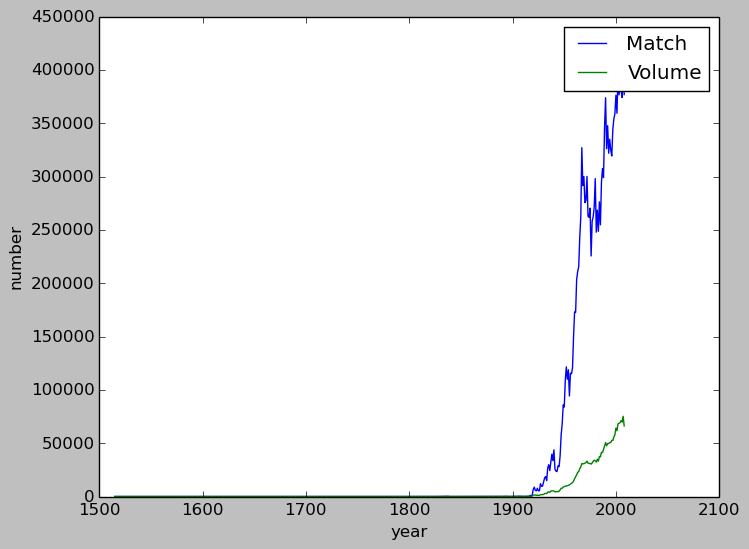

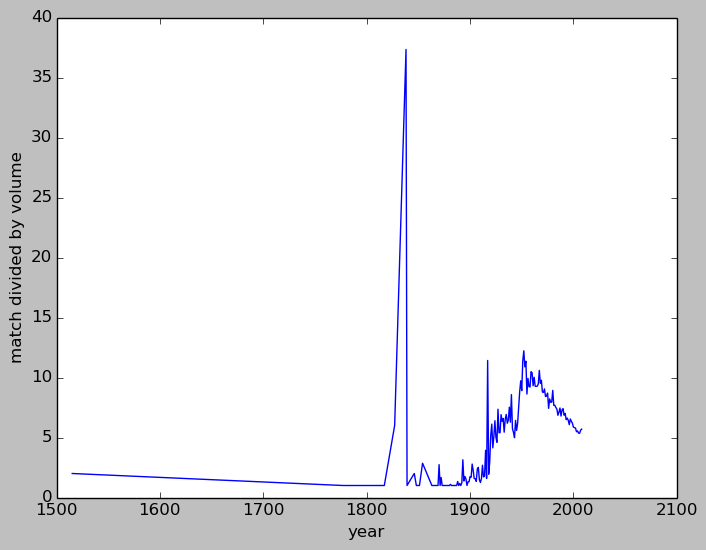

In [204]:
year = [ordered_v[i][0][1] for i in range (0,count)]
match = [ordered_m[i][1] for i in range (0,count)]
volume = [ordered_v[i][1] for i in range (0,count)]
match_db_volume = [ordered_mv[i][1] for i in range (0,count)]

fig1 = plt.figure()
plt.plot(year,match)
plt.plot(year,volume)
plt.legend(['Match','Volume'])
plt.xlabel('year')
plt.ylabel('number')

fig2 = plt.figure()
plt.plot(year,match_db_volume)
plt.xlabel('year')
plt.ylabel('match divided by volume')

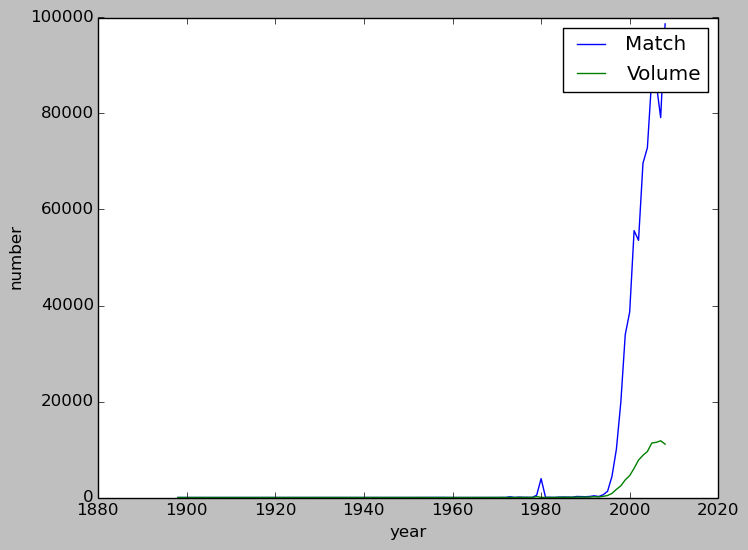

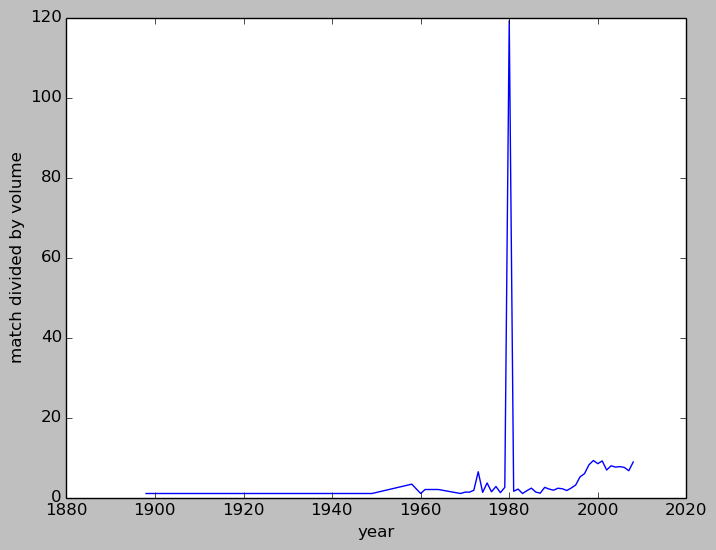

In [205]:
topic_v=voay.filter(lambda x:x[0][0]=='data mining')
topic_m=moay.filter(lambda x:x[0][0]=='data mining')
topic_mv=mdbv.filter(lambda x:x[0][0]=='data mining')
count=topic_v.count()
ordered_v=topic_v.sortBy(lambda x:x[0][1]).collect()
ordered_m=topic_m.sortBy(lambda x:x[0][1]).collect()
ordered_mv=topic_mv.sortBy(lambda x:x[0][1]).collect()

year = [ordered_v[i][0][1] for i in range (0,count)]
match = [ordered_m[i][1] for i in range (0,count)]
volume = [ordered_v[i][1] for i in range (0,count)]
match_db_volume = [ordered_mv[i][1] for i in range (0,count)]

fig1 = plt.figure()
plt.plot(year,match)
plt.plot(year,volume)
plt.legend(['Match','Volume'])
plt.xlabel('year')
plt.ylabel('number')

fig2 = plt.figure()
plt.plot(year,match_db_volume)
plt.xlabel('year')
plt.ylabel('match divided by volume')

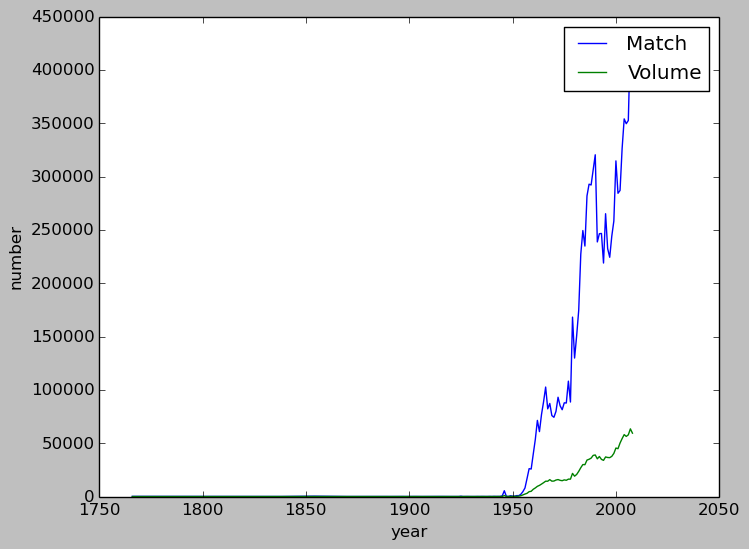

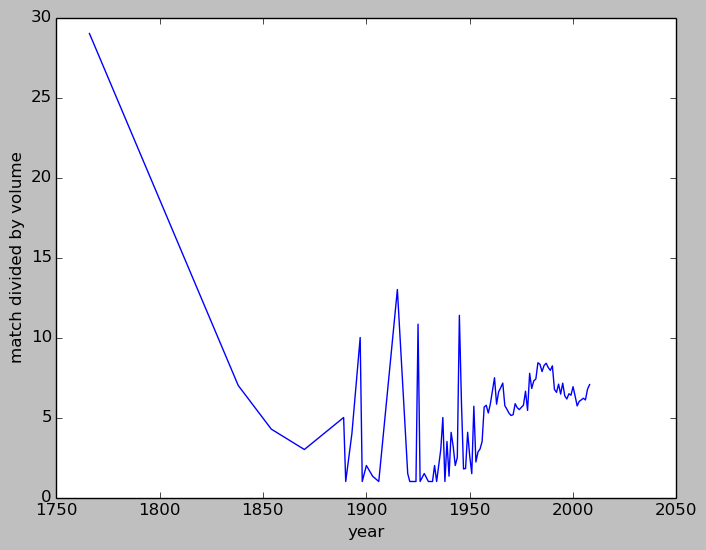

In [206]:
topic_v=voay.filter(lambda x:x[0][0]=='nuclear weapon')
topic_m=moay.filter(lambda x:x[0][0]=='nuclear weapon')
topic_mv=mdbv.filter(lambda x:x[0][0]=='nuclear weapon')
count=topic_v.count()
ordered_v=topic_v.sortBy(lambda x:x[0][1]).collect()
ordered_m=topic_m.sortBy(lambda x:x[0][1]).collect()
ordered_mv=topic_mv.sortBy(lambda x:x[0][1]).collect()

year = [ordered_v[i][0][1] for i in range (0,count)]
match = [ordered_m[i][1] for i in range (0,count)]
volume = [ordered_v[i][1] for i in range (0,count)]
match_db_volume = [ordered_mv[i][1] for i in range (0,count)]

fig1 = plt.figure()
plt.plot(year,match)
plt.plot(year,volume)
plt.legend(['Match','Volume'])
plt.xlabel('year')
plt.ylabel('number')

fig2 = plt.figure()
plt.plot(year,match_db_volume)
plt.xlabel('year')
plt.ylabel('match divided by volume')